In [2]:
import sklearn
import pandas as pd

In [3]:
with open('Xtern_TrainData.csv', 'r') as file:
    content = pd.read_csv(file)
content

,Year,Major,University,Time,Order
0,Year 2,Physics,Indiana State University,12,Fried Catfish Basket
1,Year 3,Chemistry,Ball State University,14,Sugar Cream Pie
2,Year 3,Chemistry,Butler University,12,Indiana Pork Chili
3,Year 2,Biology,Indiana State University,11,Fried Catfish Basket
4,Year 3,Business Administration,Butler University,12,Indiana Corn on the Cob (brushed with garlic b...
...,...,...,...,...,...
4995,Year 2,Mathematics,Ball State University,11,Breaded Pork Tenderloin Sandwich
4996,Year 3,Astronomy,Indiana State University,12,Ultimate Grilled Cheese Sandwich (with bacon a...
4997,Year 3,Chemistry,Butler University,13,Sugar Cream Pie
4998,Year 3,Astronomy,Butler University,15,Sugar Cream Pie


## Data Preprocessing
We need to convert the X into numeric values before using `sklearn`.

In [4]:
from sklearn.model_selection import train_test_split
X = content.drop(columns=['Order'])
y = content['Order']
display(X)
display(y)

,Year,Major,University,Time
0,Year 2,Physics,Indiana State University,12
1,Year 3,Chemistry,Ball State University,14
2,Year 3,Chemistry,Butler University,12
3,Year 2,Biology,Indiana State University,11
4,Year 3,Business Administration,Butler University,12
...,...,...,...,...
4995,Year 2,Mathematics,Ball State University,11
4996,Year 3,Astronomy,Indiana State University,12
4997,Year 3,Chemistry,Butler University,13
4998,Year 3,Astronomy,Butler University,15


0                                    Fried Catfish Basket
1                                         Sugar Cream Pie
2                                      Indiana Pork Chili
3                                    Fried Catfish Basket
4       Indiana Corn on the Cob (brushed with garlic b...
                              ...                        
4995                     Breaded Pork Tenderloin Sandwich
4996    Ultimate Grilled Cheese Sandwich (with bacon a...
4997                                      Sugar Cream Pie
4998                                      Sugar Cream Pie
4999                     Breaded Pork Tenderloin Sandwich
Name: Order, Length: 5000, dtype: object

In [5]:
from sklearn.preprocessing import LabelEncoder

X = pd.get_dummies(X, columns=['Major', 'University', 'Year'])
# label_encoder = LabelEncoder()
# X['Year'] = label_encoder.fit_transform(X['Year'])


## Random Forest Method

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13) # 20% test data, 13 is just an arbitrary number
forest_model = RandomForestClassifier(n_estimators=1000, random_state=13) # n_estimators is the number of trees in the forest
forest_model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=1000, random_state=13)

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import precision_recall_curve, average_precision_score

y_pred = forest_model.predict(X_test)
y_scores = forest_model.predict_proba(X_test)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f'Confusion Matrix: {cm}')
print(f'Weighted F1 Score: {f1}')


Accuracy: 0.65
Confusion Matrix: [[42  6  7  0  4 15 11  4  2 13]
 [ 3 66  3  4  6 12  4  6  1  2]
 [ 3  8 53  1  1  3  7  0  8  5]
 [ 0  0  0 67  3  0  2  5 11  0]
 [ 2  7  2 13 49  1  6  6  4 13]
 [ 3  1  0  0  0 80  6  0  2  0]
 [ 6  1  1  0  0  1 92  3  1  0]
 [ 2  2  3 11  3  3  4 65  3  9]
 [ 0  5 15 10  2  0  3  9 62  3]
 [ 0  4  3  2  4  4  0  2  4 75]]
Weighted F1 Score: 0.6421971543167234


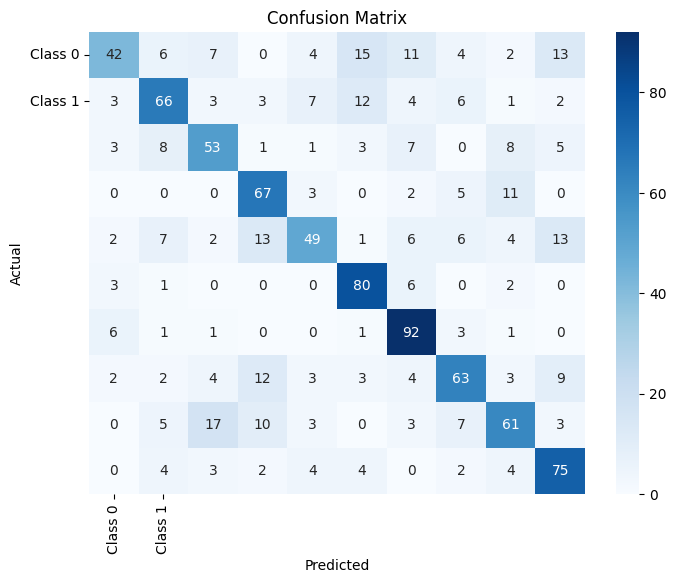

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Gradient Boosting Method

In [13]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=10, random_state=13)
gradient_model.fit(X_train, y_train)
gradient_model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=10, random_state=13)

In [14]:
y_pred = gradient_model.predict(X_test)
y_scores = gradient_model.predict_proba(X_test)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f'Confusion Matrix: {cm}')
print(f'Weighted F1 Score: {f1}')

Accuracy: 0.65
Confusion Matrix: [[42  6  7  0  4 15 11  5  2 12]
 [ 5 67  0  4  7 11  4  6  0  3]
 [ 3  9 51  2  1  3  7  0  8  5]
 [ 0  0  0 67  3  0  2  5 11  0]
 [ 2  7  0 12 48  1  6  6  6 15]
 [ 3  1  0  0  0 80  8  0  0  0]
 [ 5  1  1  0  0  1 92  3  1  1]
 [ 1  2  2 11  3  3  4 67  3  9]
 [ 1  4 15 12  1  0  3  9 61  3]
 [ 0  4  3  2  3  4  3  4  5 70]]
Weighted F1 Score: 0.6363308350663722


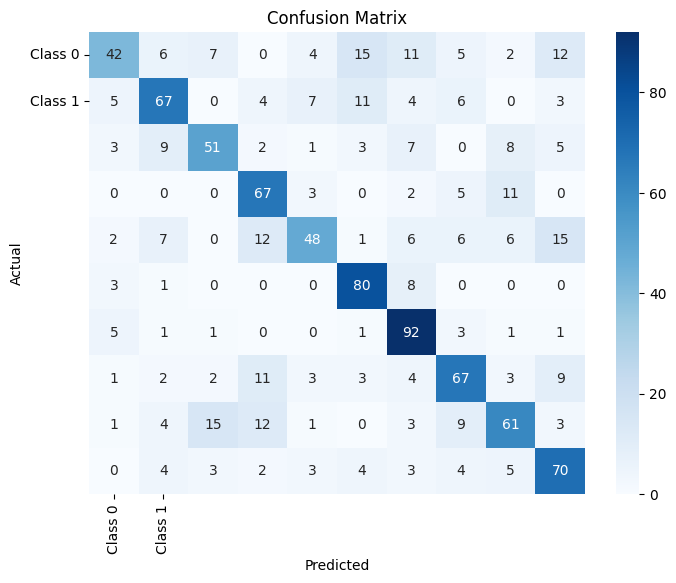

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## kNN

In [65]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=10)  # Set the number of neighbors (k) as needed
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [66]:
y_pred = knn_model.predict(X_test)
y_scores = knn_model.predict_proba(X_test)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f'Confusion Matrix: {cm}')
print(f'Weighted F1 Score: {f1}')

Accuracy: 0.64
Confusion Matrix: [[47  7  7  0  3 14 13  3  0 10]
 [ 3 70  1  3 11  9  4  3  2  1]
 [ 3 11 55  1  1  2  7  0  8  1]
 [ 0  0  0 67  6  0  2  3  9  1]
 [ 3  8  0 12 55  1  4  4  5 11]
 [ 1  3  0  0  0 81  7  0  0  0]
 [ 5  2  1  0  0  1 94  1  1  0]
 [ 1  4  3 18  9  6  2 55  0  7]
 [ 0  5 17 15  9  1  3  5 53  1]
 [ 2  4  3  2 15  4  3  2  4 59]]
Weighted F1 Score: 0.6289662708615212


In [73]:
import xgboost as xgb
X = content.drop(columns=['Order'])
y = label_encoder.fit_transform(content['Order'])
X = pd.get_dummies(X, columns=['Major', 'University'])
label_encoder = LabelEncoder()
X['Year'] = label_encoder.fit_transform(X['Year'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(set(content['Order'])), max_depth=4, n_estimators=100, learning_rate=0.1, random_state=13)
model.fit(X_train, y_train)


In [74]:
y_pred = model.predict(X_test)
y_scores = knn_model.predict_proba(X_test)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f'Confusion Matrix: {cm}')
print(f'Weighted F1 Score: {f1}')

Accuracy: 0.63
Confusion Matrix: [[43  2  2  0  3 18 17  5  1 13]
 [ 0 65  2  3  7 22  3  3  1  1]
 [ 4 10 48  1  0  3 10  0  9  4]
 [ 0  0  0 55  6  0  2 12 13  0]
 [ 4  9  0 10 48  3  2  6  6 15]
 [ 1  2  0  0  0 80  7  2  0  0]
 [ 6  0  1  0  0  3 94  1  0  0]
 [ 3  6  2  6  3  9  6 62  0  8]
 [ 0  6 14  3  0  2  5  9 67  3]
 [ 0  3  4  2  4  4  3  7  6 65]]
Weighted F1 Score: 0.6195781616743675


## Packaging the ML Model

In [18]:
import joblib
joblib.dump(gradient_model, 'gradient_boost_model.pkl')

['gradient_boost_model.pkl']

## Deploying the ML Model with `predict()` function

In [21]:
'''
This function takes in a DataFrame with only one row of data containing the background information of a customer.

:param data: DataFrame with only one row of data containing the background information of a customer. Format: {'Year': string, 'Major': string, 'University': string, 'Time': int}

Returns a prediction of the customer's order choice (string)
'''
def predict(data):
    model = joblib.load('gradient_boost_model.pkl')
    # We need to restore the one-hot encoding
    training_cols = ['Time', 'Major_Accounting', 'Major_Anthropology', 'Major_Astronomy',
       'Major_Biology', 'Major_Business Administration', 'Major_Chemistry',
       'Major_Civil Engineering', 'Major_Economics', 'Major_Finance',
       'Major_Fine Arts', 'Major_International Business', 'Major_Marketing',
       'Major_Mathematics', 'Major_Mechanical Engineering', 'Major_Music',
       'Major_Philosophy', 'Major_Physics', 'Major_Political Science',
       'Major_Psychology', 'Major_Sociology',
       'University_Ball State University', 'University_Butler University',
       'University_DePauw University', 'University_Indiana State University',
       'University_Indiana University Bloomington',
       'University_Indiana University-Purdue University Indianapolis (IUPUI)',
       'University_Purdue University', 'University_University of Evansville',
       'University_University of Notre Dame',
       'University_Valparaiso University', 'Year_Year 1', 'Year_Year 2',
       'Year_Year 3', 'Year_Year 4']
    
    data = pd.get_dummies(data, columns=['Major', 'University', 'Year'])
    new_data = pd.DataFrame(data, columns=training_cols)
    # data will be having less columns than training_cols because it won't have all the majors, universities, and years
    # So those columns will be designated as NaN 
    # we will fill them with False here
    new_data = new_data.fillna(False)
    return model.predict(new_data)[0]

In [22]:
import pandas as pd
data = pd.DataFrame({
    'Year': ['Year 2'],
    'Major': ['Chemistry'],
    'University': ['Indiana State University'],
    'Time': [11]
})

predict(data)

'Fried Catfish Basket'